<a href="https://colab.research.google.com/github/OjChi/DS-Lab/blob/main/Lab_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 1: Linear Regression
Name: Ojasa Chitre


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from prettytable import PrettyTable

Outcomes:

1. To learn how to define, fit, and use a model in Python

2. To interpret the results

####Data:
**Title: Auto-Mpg Data**

Attribute Information:

mpg: continuous<br>
cylinders: multi-valued discrete<br>
displacement: continuous<br>
horsepower: continuous<br>
weight: continuous<br>
acceleration: continuous<br>
model year: multi-valued discrete<br>
origin: multi-valued discrete<br>
car name: string (unique for each instance)<br>

##Step 1: Loading the dataset

In [ ]:
auto_data = pd.read_csv("/content/drive/MyDrive/Engineering/BE/Sem8/DS/Lab/Lab1/auto-mpg.csv")

In [ ]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


####Q. How many features are present and how many records are present?

In [ ]:
auto_data.shape

(398, 9)

We can see that there are 398 records with 9 features including the target column.

In [ ]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


We can see that there are many columns here some numeric some categorical. There are quite a few with NaN values. 

####Q. What is the range of the target in the dataset?

In [ ]:
min(auto_data['mpg']),max(auto_data['mpg'])

(9.0, 46.6)

The range of the mpg is from 9mpg to 46.6 mpg.

####Q. What is the distribution of data for the different values?

In [ ]:
sorted_auto_data_mpg = auto_data['mpg'].sort_values()

In [ ]:
sorted_auto_data_mpg

28      9.0
25     10.0
26     10.0
103    11.0
124    11.0
       ... 
326    43.4
394    44.0
325    44.3
329    44.6
322    46.6
Name: mpg, Length: 398, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


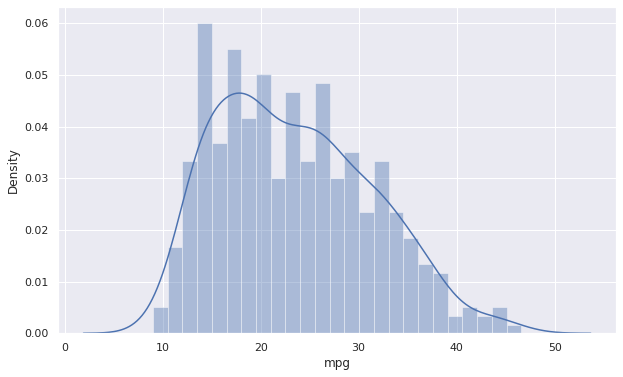

In [ ]:
# sorted_auto_data_mpg.plot(kind="bar", figsize=(100,10))
sns.set()
plt.subplots(figsize=(10, 6))
sns.distplot(sorted_auto_data_mpg,bins=25)
plt.show()

####Q. How many null values are present in each column?

In [ ]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
auto_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

##Step 2: Data Preprocessing

####Q. What percentage of the rows in each column are null?

In [ ]:
cols_to_remove = []
for col in auto_data.columns[3:22]:
  print(col)
  null_percentage = (auto_data[col].isna().sum()*100)/len(auto_data)
  print(null_percentage)
  if null_percentage > 50.0:
    cols_to_remove.append(col)
    print("To be removed")
  print()

horsepower
0.0

weight
0.0

acceleration
0.0

model year
0.0

origin
0.0

car name
0.0



In [ ]:
auto_data['horsepower'] = auto_data['horsepower'].astype(str)

####Q. Which columns should be imputed in this dataset?

There are certain categorical and non-categorical

####Q. How can you impute the values?

We have 2 types of values. In case of the numeric (non-categorical) we can impute by the mean of the column. In case of the categorical columns since we don't have numeric values we can not impute by mean we will be imputing by mode.

In [ ]:
categorical_columns = []
for col in auto_data.columns:
  if np.issubdtype(auto_data[col].dtype,object):
    print('\nCategorical')
    print(col,auto_data[col].mode()[0])
    # horse_data[col] = horse_data[col].fillna(horse_data[col].mode()[0])
    auto_data[col].replace({"?": auto_data[col].mode()[0]}, inplace=True)
    categorical_columns.append(col)
    
  else:
    print('\nNon-categorical')
    print(col,auto_data[col].mean())
    auto_data[col] = auto_data[col].fillna(auto_data[col].median())


Non-categorical
mpg 23.514572864321615

Non-categorical
cylinders 5.454773869346734

Non-categorical
displacement 193.42587939698493

Categorical
horsepower 150

Non-categorical
weight 2970.424623115578

Non-categorical
acceleration 15.568090452261291

Non-categorical
model year 76.01005025125629

Non-categorical
origin 1.5728643216080402

Categorical
car name ford pinto


In [ ]:
auto_data['horsepower'].astype(str).astype(int)

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: int64

In [ ]:
labelencoder = preprocessing.LabelEncoder()

for col in categorical_columns:
  auto_data[col] = labelencoder.fit_transform(auto_data[col])

In [ ]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.1 KB


##Step 3: EDA

In [ ]:
auto_data_corr = auto_data.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
auto_data_corr.rename(columns={"level_0": "Feature A", 
                             "level_1": "Feature B", 0: 'Correlation Coefficient'}, inplace=True)
auto_data_corr[auto_data_corr['Feature A'] == 'mpg'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
0,mpg,mpg,1.000000
15,mpg,weight,0.831741
18,mpg,displacement,0.804203
19,mpg,cylinders,0.775396
25,mpg,model year,0.579267
27,mpg,origin,0.563450
42,mpg,horsepower,0.437325
44,mpg,acceleration,0.420289
64,mpg,car name,0.273936


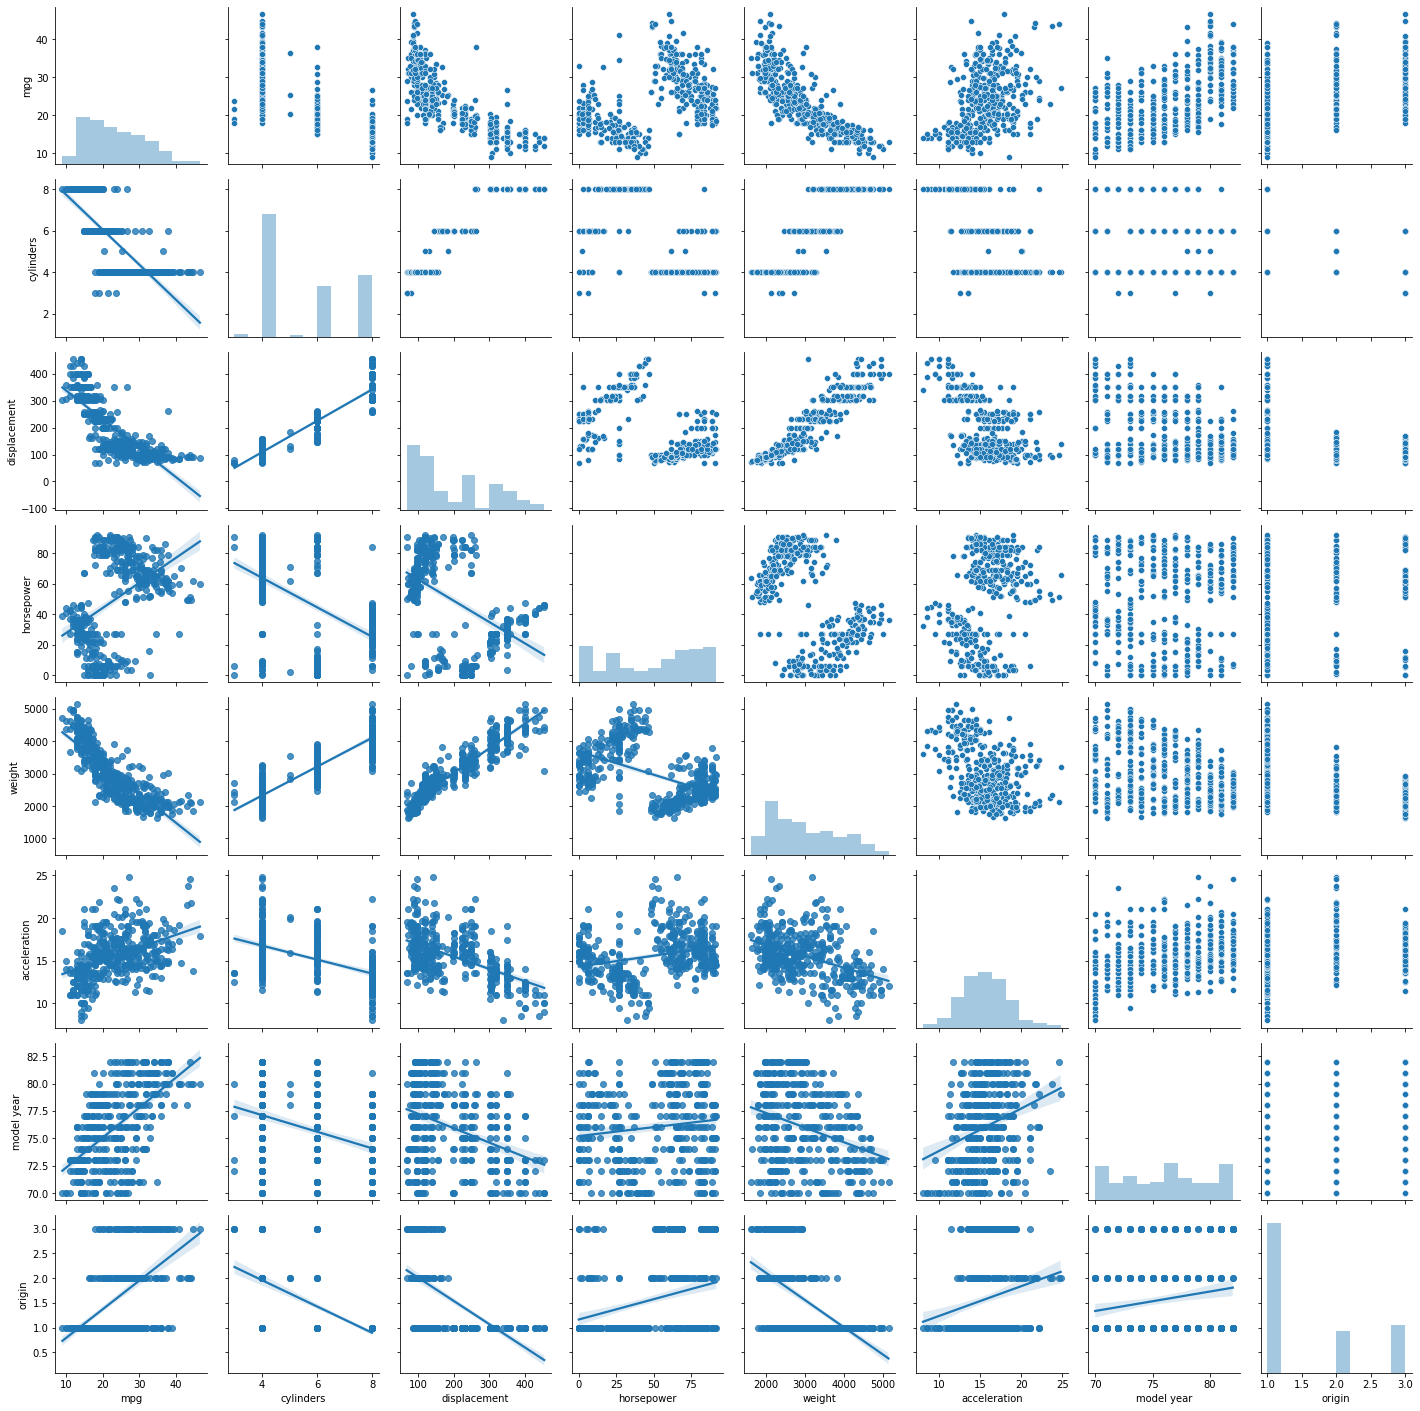

In [ ]:
g = sns.PairGrid(auto_data.drop('car name',axis=1))
g = g.map_diag(plt.hist, alpha=0.4)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.regplot)

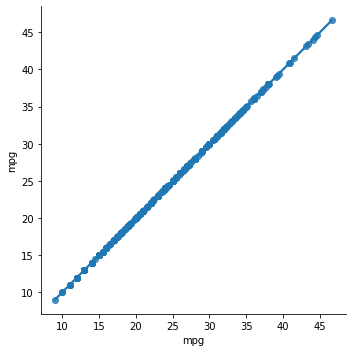

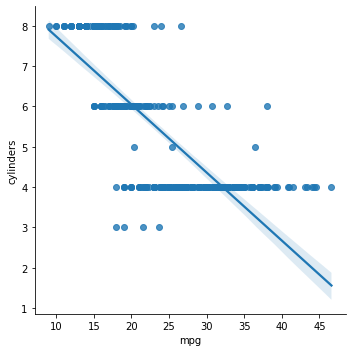

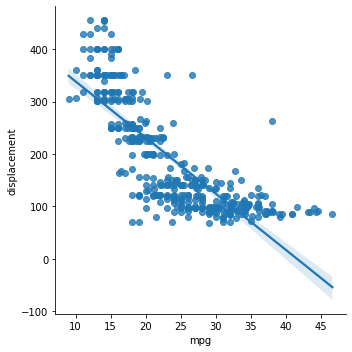

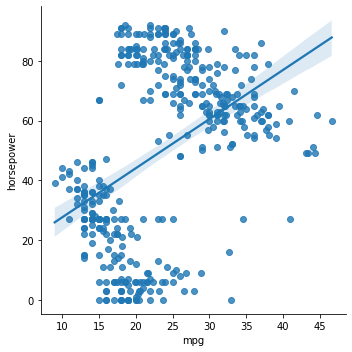

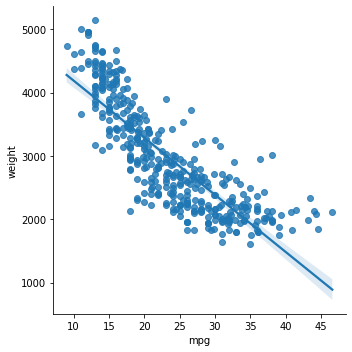

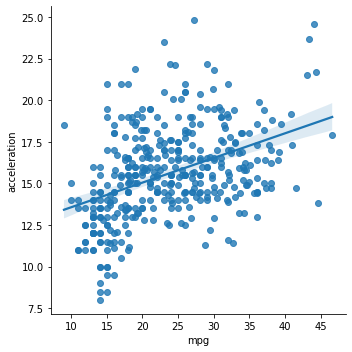

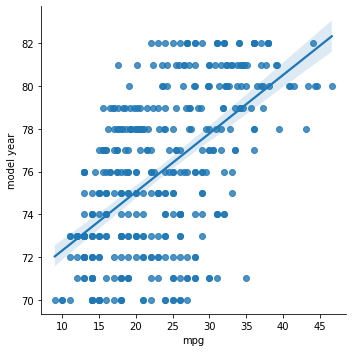

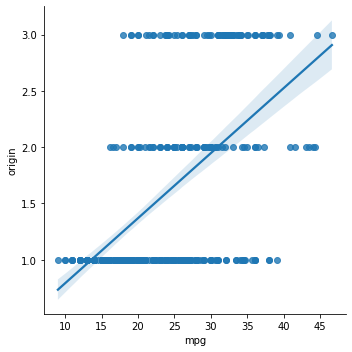

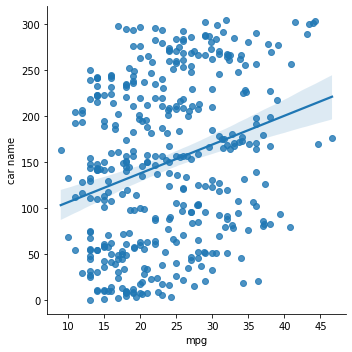

In [ ]:
for col in auto_data.columns:
  sns.lmplot(x='mpg',y=col, data=auto_data)
  plt.show()

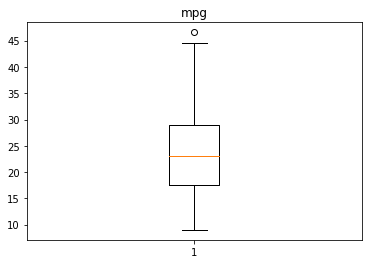

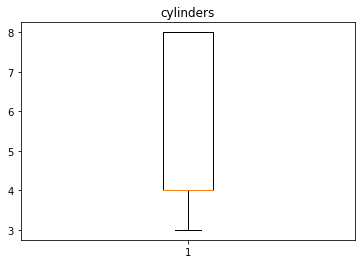

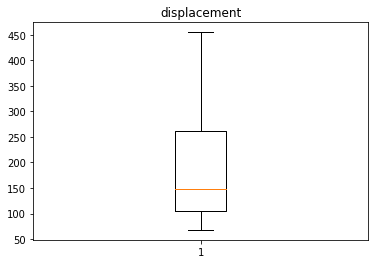

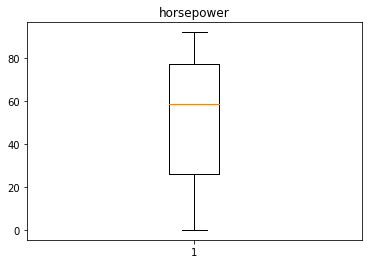

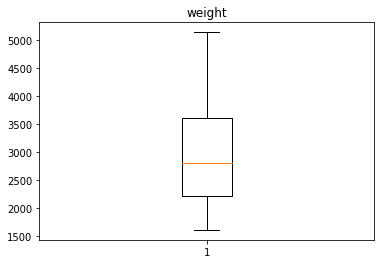

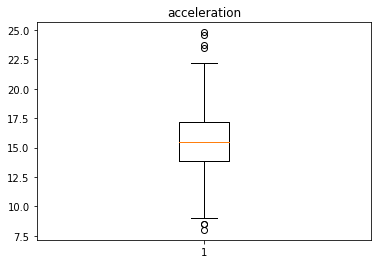

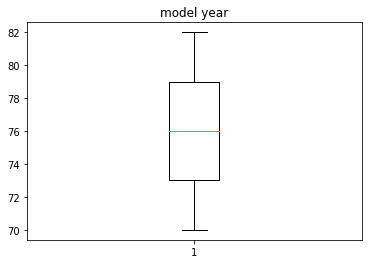

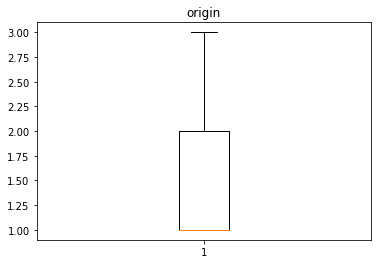

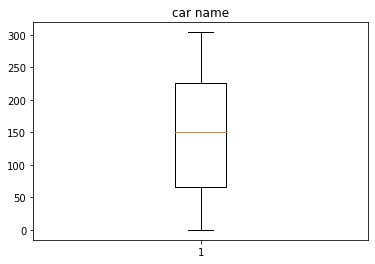

In [ ]:
for col in auto_data.columns:
  plt.boxplot(auto_data[col])
  plt.title(col)
  plt.show()

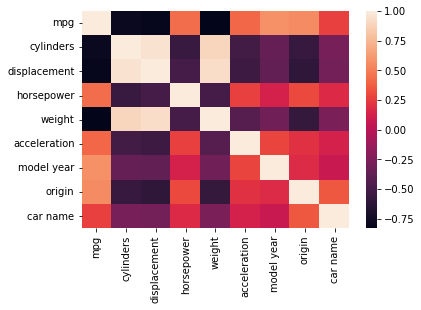

In [ ]:
sns.heatmap(auto_data.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


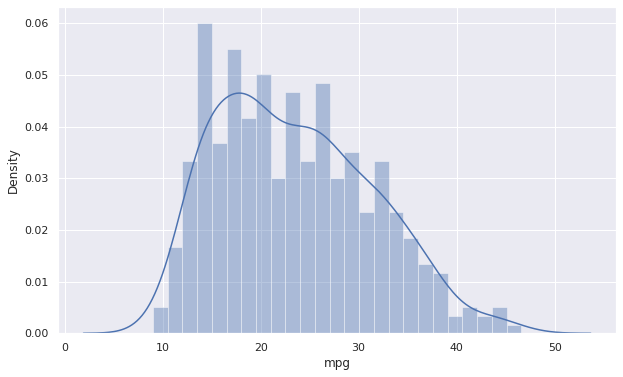

In [ ]:
sns.set()
plt.subplots(figsize=(10, 6))
sns.distplot(auto_data['mpg'],bins=25)
plt.show()

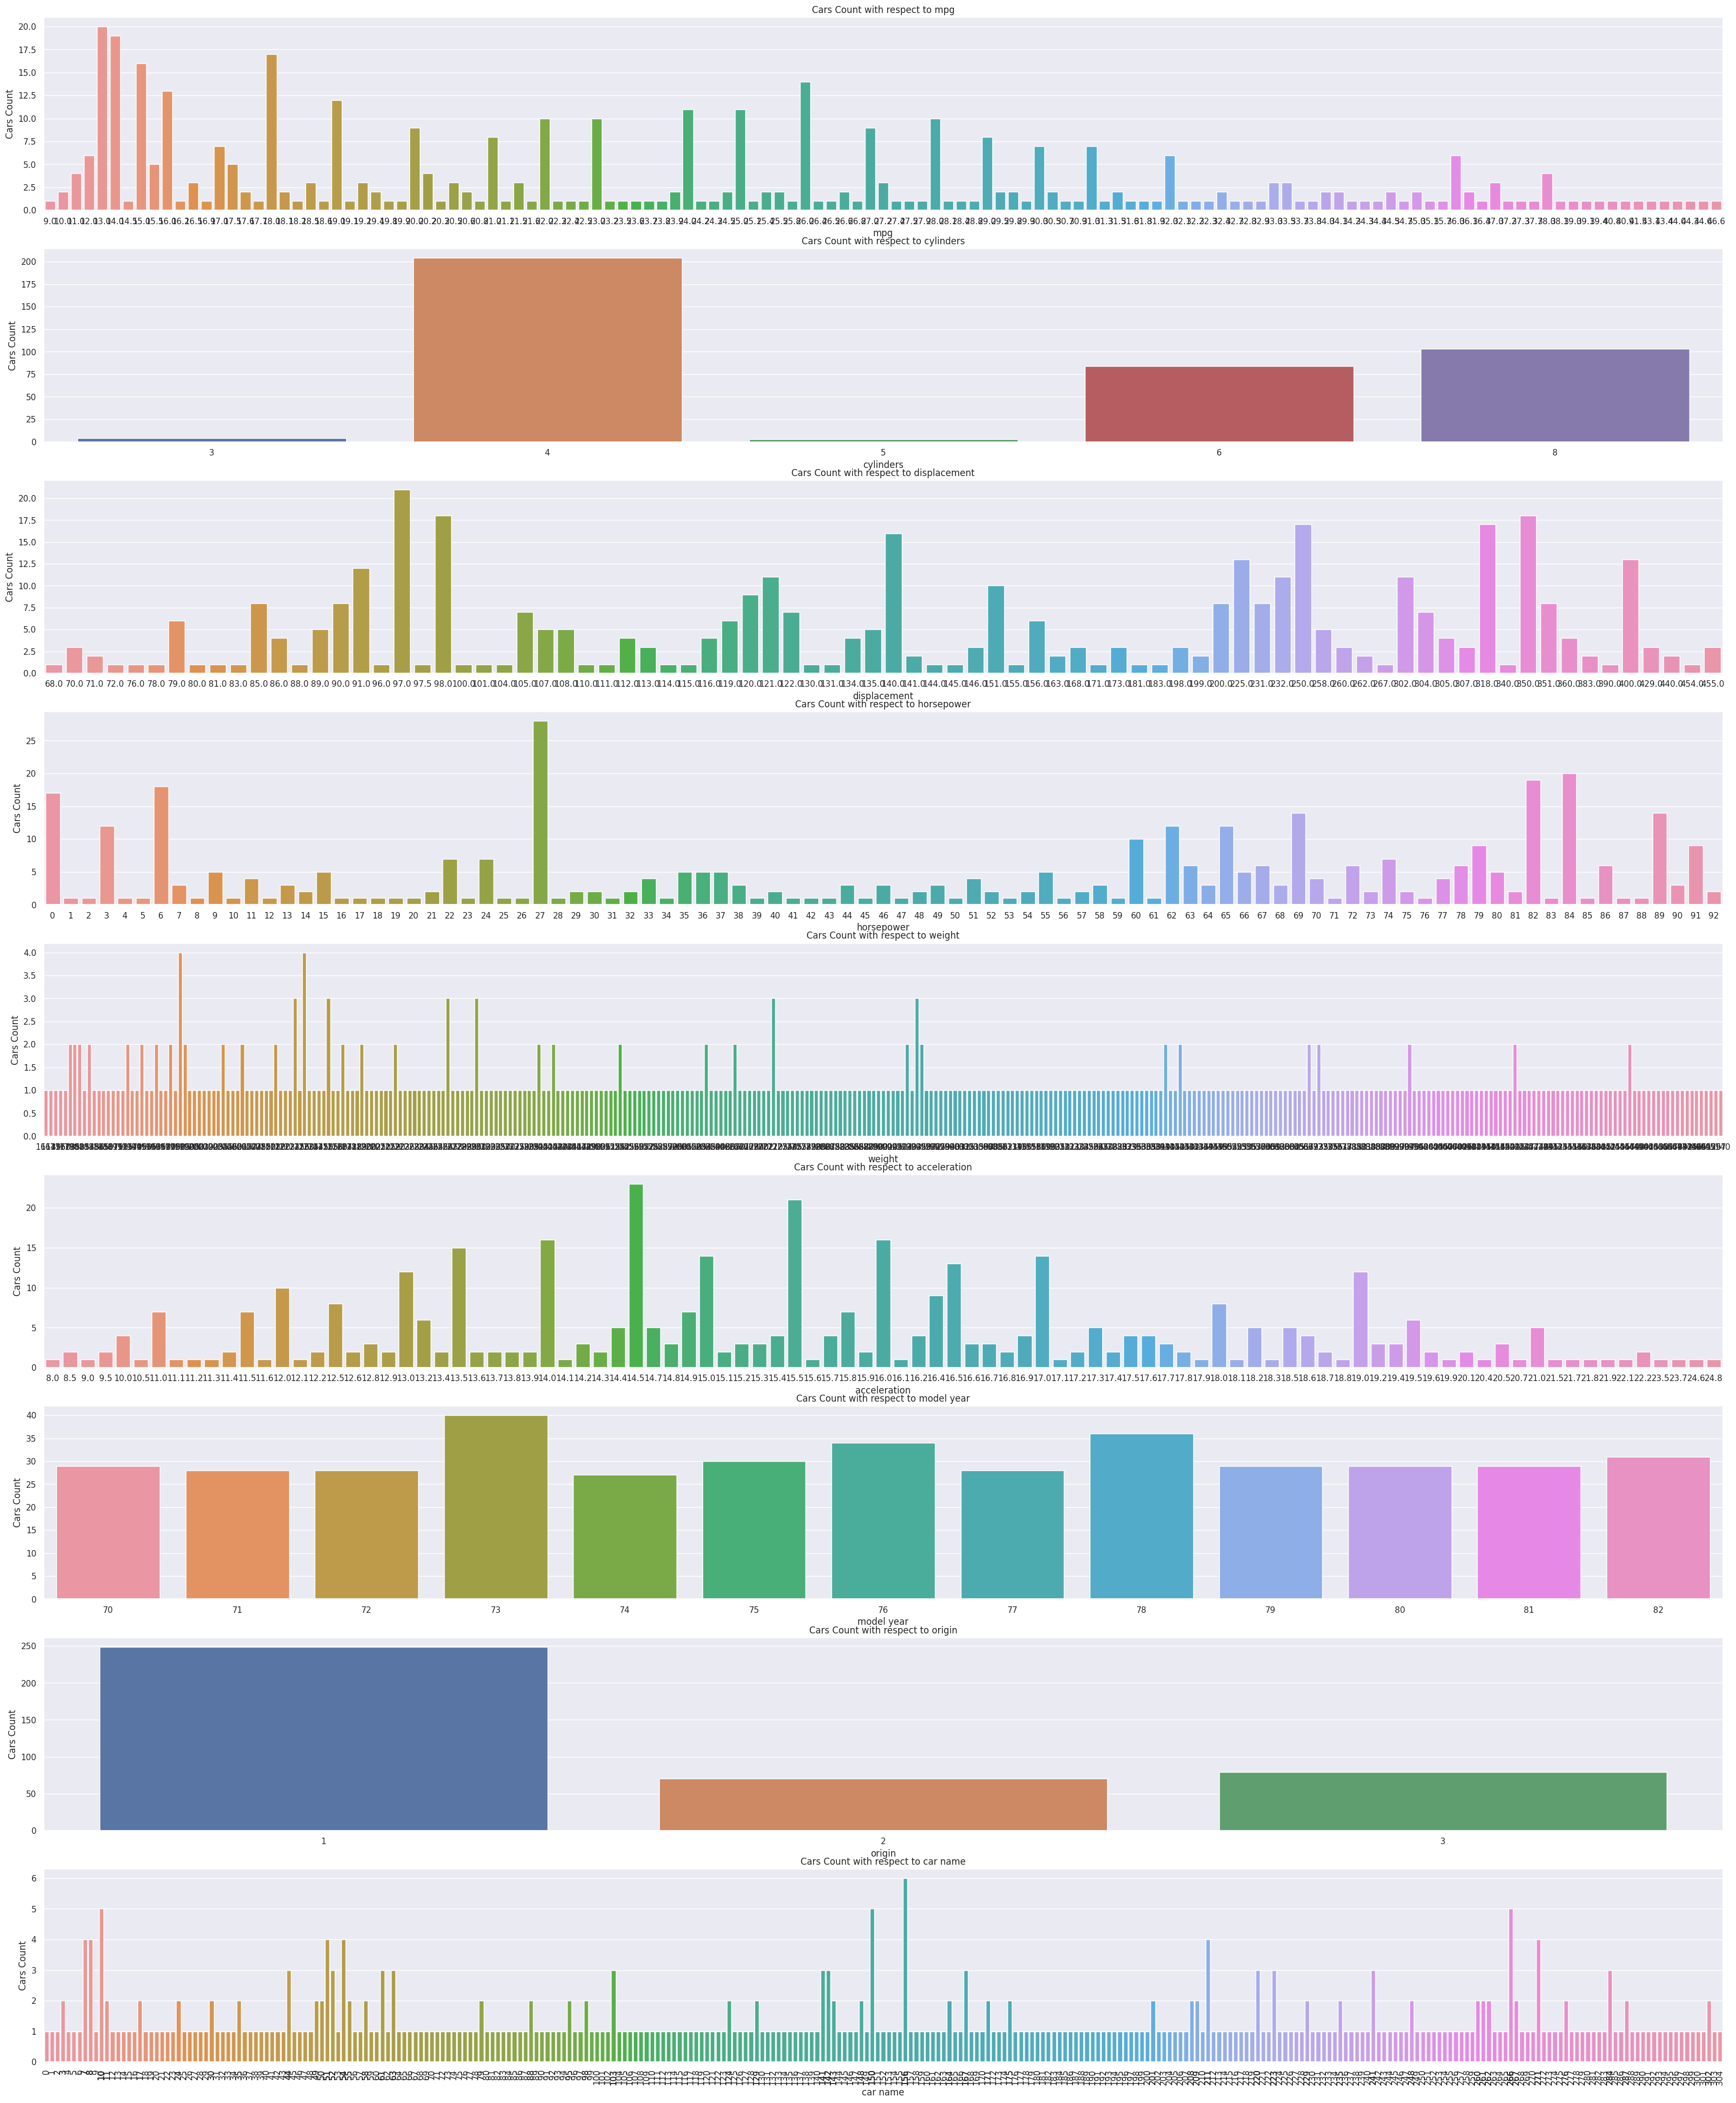

In [ ]:
fig, axes = plt.subplots(figsize=(40, 50), nrows=len(auto_data.columns), ncols=1, dpi=100)
c = 0
for col in auto_data.columns:
  sns.countplot(x=col, data=auto_data, ax=axes[c])
  axes[c].set_title("Cars Count with respect to "+col)
  axes[c].set_ylabel("Cars Count")
  axes[c].set_xlabel(col)
  plt.xticks(auto_data[col],auto_data[col],rotation='vertical')
  c+=1

plt.show()

In [ ]:
auto_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
mpg,1.000000,-0.775396,-0.804203,0.437325,-0.831741,0.420289,0.579267,0.563450,0.273936
cylinders,-0.775396,1.000000,0.950721,-0.559640,0.896017,-0.505419,-0.348746,-0.562543,-0.275754
displacement,-0.804203,0.950721,1.000000,-0.495896,0.932824,-0.543684,-0.370164,-0.609409,-0.292064
horsepower,0.437325,-0.559640,-0.495896,1.000000,-0.497223,0.270335,0.129519,0.300165,0.170821
weight,-0.831741,0.896017,0.932824,-0.497223,1.000000,-0.417457,-0.306564,-0.581024,-0.255247
acceleration,0.420289,-0.505419,-0.543684,0.270335,-0.417457,1.000000,0.288137,0.205873,0.128285
model year,0.579267,-0.348746,-0.370164,0.129519,-0.306564,0.288137,1.000000,0.180662,0.074761
origin,0.563450,-0.562543,-0.609409,0.300165,-0.581024,0.205873,0.180662,1.000000,0.360058
car name,0.273936,-0.275754,-0.292064,0.170821,-0.255247,0.128285,0.074761,0.360058,1.000000


In [ ]:
#@title Outlier removal not needed
# # calculate summary statistics
# number_of_columns_dropped = 0
# for col in auto_data.columns:
#     data_mean, data_std = np.mean(auto_data[col]), np.std(auto_data[col])
#     # identify outliers
#     cut_off = data_std * 3
#     lower, upper = data_mean - cut_off, data_mean + cut_off
    
#     print(f'\nDropping from {col} - Lower {lower} and Upper {upper}')

#     # identify outliers
#     outliers = [x for x in auto_data[col] if x < lower or x > upper]

#     for ind in auto_data.index:
#     #     print(df['Name'][ind], df['Stream'][ind])
#         if auto_data[col][ind] < lower or auto_data[col][ind] > upper:
#             print(f'{auto_data[col][ind]}')
#             auto_data.drop(ind,inplace=True)
#             number_of_columns_dropped+=1

##Step 4: Data Partition

In [ ]:
X = auto_data.drop(['mpg'],axis=1)
y = auto_data['mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Step 5: Build Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
poly.fit(X_train)
X_train=pd.DataFrame(poly.transform(X_train))
X_test=pd.DataFrame(poly.transform(X_test))

In [ ]:
LinReg = LinearRegression()

##Step 6: Summarize the model

In [ ]:
LinReg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
LinReg.fit(X_train,y_train)

LinearRegression()

##Step 7: Prediction

In [ ]:
predictions = LinReg.predict(X_test)

##Step 8: Evaluation

In [ ]:
score = LinReg.score(X_test, y_test)
print(score)

0.8827151639430021


In [ ]:
score = LinReg.score(X_train, y_train)
print(score)

0.8941282823050852


##Step 9: Tuning Model

In [ ]:
x = PrettyTable()

x.field_names = ["Predicted", "Actual", "Difference"]

In [ ]:
mse = 0

for i,j in zip(predictions,y_test):
  mse += (i-j)**2
  x.add_row([i,j,abs(i-j)])

mse = (mse / len(predictions))**0.5

In [ ]:
mse

2.5111727420841743

In [ ]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,49.811558,2970.424623,15.568090,76.010050,1.572864,148.550251
std,7.815984,1.701004,104.269838,29.410363,846.841774,2.757689,3.697627,0.802055,89.495880
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,26.250000,2223.750000,13.825000,73.000000,1.000000,65.250000
50%,23.000000,4.000000,148.500000,58.500000,2803.500000,15.500000,76.000000,1.000000,150.000000
75%,29.000000,8.000000,262.000000,77.000000,3608.000000,17.175000,79.000000,2.000000,225.750000
max,46.600000,8.000000,455.000000,92.000000,5140.000000,24.800000,82.000000,3.000000,304.000000


Test<br>
0.8827151639430021

Train<br>
0.8941282823050852

##Conclusion:
In the process of working with the data I was able to add various kinds of preprocessing. I worked on it my running the model over and over after applying preprocessing step by step. I came to realise how imputing with mean or median will affect the data. I learnt that keeping outliers will skew the result. I created by own piece of code to remove them. 